# Coded by Abhinay Kalavakuri 

* Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

* Reading dataset

In [2]:
train=pd.read_csv("E:/50_Startups.csv")

In [3]:
train.drop_duplicates(inplace=True)

In [4]:
train

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [5]:
train.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

<Axes: ylabel='R&D Spend'>

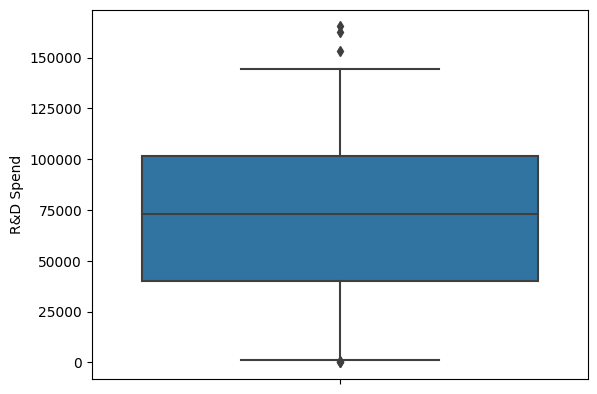

In [6]:
sns.boxplot(y=train['R&D Spend'],whis=[5,95])

<Axes: ylabel='Administration'>

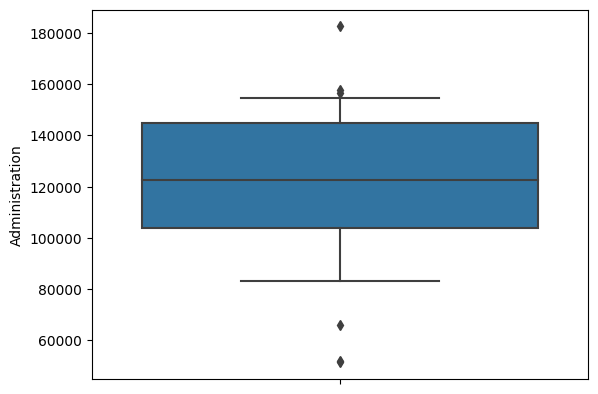

In [7]:
sns.boxplot(y=train['Administration'],whis=[5,95])

<Axes: ylabel='Marketing Spend'>

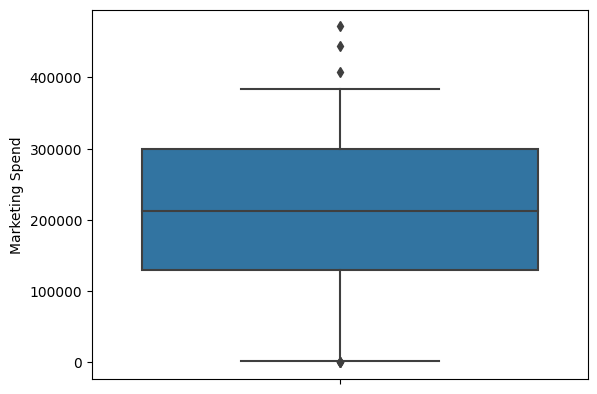

In [8]:
sns.boxplot(y=train['Marketing Spend'],whis=[5,95])

<Axes: ylabel='Profit'>

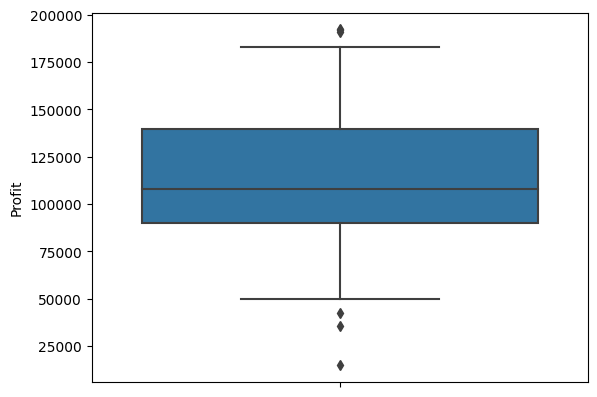

In [9]:
sns.boxplot(y=train['Profit'],whis=[5,95])

* Removing Outliers

In [10]:

def outliers(data,column,a):
    for x in column:
        iqr = data[x].quantile(0.75) - data[x].quantile(0.25)
        upper_boundary = data[x].quantile(0.75) + (a*iqr)
        lower_boundary = data[x].quantile(0.25) - (a*iqr)
        data = data[(data[x] < upper_boundary) & (data[x] > lower_boundary)]
    return data

In [11]:
train = outliers(train,['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'],1.5)

In [12]:
train

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [13]:
train.drop([19,47,48],axis="rows",inplace=True) #invalid because of 0 for predictions
train

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


* Normalizing Data

In [14]:
from sklearn.preprocessing import StandardScaler
nor=StandardScaler()
for i in train.columns:
    a=np.array(train[i]).reshape(-1,1)
    nor.fit(a)
    train[i]=nor.transform(a).reshape(-1,1)

In [15]:
train

,R&D Spend,Administration,Marketing Spend,Profit
0,2.015547,0.563760,2.210237,2.114261
1,1.951881,1.109761,1.957008,2.101053
2,1.740019,-0.784378,1.630418,2.080201
3,1.530173,-0.123500,1.405800,1.851100
4,1.477762,-1.152172,1.251140,1.381169
5,1.241044,-0.834561,1.221108,1.122591
6,1.304411,0.952190,-0.914243,1.098170
7,1.204514,0.889263,0.867088,1.087769
8,0.978782,1.009509,0.755724,0.988215
9,1.043394,-0.500302,0.695502,0.919280


* Splitting dataset into Train and Test sets

In [16]:
from sklearn.model_selection import train_test_split
x=train.drop("Profit",axis="columns")
y=train['Profit']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [17]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (32, 3)
Shape of x_test:  (14, 3)
Shape of y_train:  (32,)
Shape of y_test:  (14,)


In [18]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [19]:
models={0: 'Linear Regression',
1:' SGD Regressor',
2: 'Ridge Regression',
3: 'Random Forest Regressor',
4: 'Decision Tree Regressor',
5: 'Lasso Regression'}

rmse=[]
mae=[]
mse=[]
r2=[]

* Using Linear Regression

In [20]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print("Metrics of Linear Regression")
print("RMSE:",mean_squared_error(y_test,y_pred)**0.5)
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",lr.score(x_test,y_test))

rmse.append(mean_squared_error(y_test,y_pred)**0.5)
mae.append(mean_absolute_error(y_test,y_pred))
mse.append(mean_squared_error(y_test,y_pred))
r2.append(lr.score(x_test,y_test))

Metrics of Linear Regression
RMSE: 0.24414928017169377
MAE:  0.20865417029982267
MSE:  0.05960887100835621
R2 score:  0.9340489707893036


* Using Stochastic Gradient Descent Regression

In [21]:
model_sgd=SGDRegressor()
model_sgd.fit(x_train,y_train)
y_pre=model_sgd.predict(x_test)

print("Metris of SGD Regression")
print("RMSE:",mean_squared_error(y_test,y_pre)**0.5)
print("MAE: ",mean_absolute_error(y_test,y_pre))
print("MSE: ",mean_squared_error(y_test,y_pre))
print("R2 score: ",model_sgd.score(x_test,y_test))

rmse.append(mean_squared_error(y_test,y_pre)**0.5)
mae.append(mean_absolute_error(y_test,y_pre))
mse.append(mean_squared_error(y_test,y_pre))
r2.append(model_sgd.score(x_test,y_test))

Metris of SGD Regression
RMSE: 0.34957890908344297
MAE:  0.25605488614256683
MSE:  0.12220541367597007
R2 score:  0.8647923929658169


* Using Ridge Regression

In [22]:
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)
y_pr=model_ridge.predict(x_test)

print("Metrics of Ridge Regression")
print("RMSE:",mean_squared_error(y_test,y_pr)**0.5)
print("MAE: ",mean_absolute_error(y_test,y_pr))
print("MSE: ",mean_squared_error(y_test,y_pr))
print("R2 score: ",model_ridge.score(x_test,y_test))

rmse.append(mean_squared_error(y_test,y_pr)**0.5)
mae.append(mean_absolute_error(y_test,y_pr))
mse.append(mean_squared_error(y_test,y_pr))
r2.append(model_ridge.score(x_test,y_test))

Metrics of Ridge Regression
RMSE: 0.2514437460744679
MAE:  0.21238015214762607
MSE:  0.06322395743996148
R2 score:  0.9300492528477146


* Using Random Forest Regression

In [23]:
model_random=RandomForestRegressor()
model_random.fit(x_train,y_train)
y_random=model_random.predict(x_test)

print("Metrics of Random Forest Regression")
print("RMSE:",mean_squared_error(y_test,y_random)**0.5)
print("MAE: ",mean_absolute_error(y_test,y_random))
print("MSE: ",mean_squared_error(y_test,y_random))
print("R2 score: ",model_random.score(x_test,y_test))

rmse.append(mean_squared_error(y_test,y_random)**0.5)
mae.append(mean_absolute_error(y_test,y_random))
mse.append(mean_squared_error(y_test,y_random))
r2.append(model_random.score(x_test,y_test))

Metrics of Random Forest Regression
RMSE: 0.35997621194599666
MAE:  0.28518507575223234
MSE:  0.1295828731669891
R2 score:  0.8566299997152431


* Using Decision Tree Regression

In [24]:
model_tree=DecisionTreeRegressor()
model_tree.fit(x_train,y_train)
y_tree=model_tree.predict(x_test)

print("Metrics of Decision Tree Regression")
print("RMSE:",mean_squared_error(y_test,y_tree)**0.5)
print("MAE: ",mean_absolute_error(y_test,y_tree))
print("MSE: ",mean_squared_error(y_test,y_tree))
print("R2 score: ",model_tree.score(x_test,y_test))

rmse.append(mean_squared_error(y_test,y_tree)**0.5)
mae.append(mean_absolute_error(y_test,y_tree))
mse.append(mean_squared_error(y_test,y_tree))
r2.append(model_tree.score(x_test,y_test))

Metrics of Decision Tree Regression
RMSE: 0.3864153054762423
MAE:  0.262486994388291
MSE:  0.14931678830629766
R2 score:  0.8347964707156501


* Using Lasso Regression

In [25]:
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)
y_p=model_lasso.predict(x_test)

print("Metrics of Lasso Regression")
print("RMSE:",mean_squared_error(y_test,y_p)**0.5)
print("MAE: ",mean_absolute_error(y_test,y_p))
print("MSE: ",mean_squared_error(y_test,y_p))
print("R2 score: ",model_lasso.score(x_test,y_test))

rmse.append(mean_squared_error(y_test,y_p)**0.5)
mae.append(mean_absolute_error(y_test,y_p))
mse.append(mean_squared_error(y_test,y_p))
r2.append(model_lasso.score(x_test,y_test))

Metrics of Lasso Regression
RMSE: 1.0124401658635624
MAE:  0.8269035942223661
MSE:  1.0250350894538378
R2 score:  -0.13409494229612418


In [26]:
mse

[0.05960887100835621,
 0.12220541367597007,
 0.06322395743996148,
 0.1295828731669891,
 0.14931678830629766,
 1.0250350894538378]

* Finalizing Suitable Model by MSE metric

In [27]:
print(f"{models[mse.index(min(mse))]} model has less error")
print("Metrics of that model")
print("RMSE: ",rmse[mse.index(min(mse))])
print("MSE: ",mse[mse.index(min(mse))])
print("MAE: ",mae[mse.index(min(mse))])
print('R2: ',r2[mse.index(min(mse))])

normal_error=mse[mse.index(min(mse))]

Linear Regression model has less error
Metrics of that model
RMSE:  0.24414928017169377
MSE:  0.05960887100835621
MAE:  0.20865417029982267
R2:  0.9340489707893036


In [28]:
x_train.shape

(32, 3)

* Building Neural Network Model

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [30]:
model_nn=Sequential()
model_nn.add(Dense(16,activation="relu",input_shape=(3,)))
model_nn.add(Dense(8,activation="relu"))
model_nn.add(Dense(1))


In [32]:
model_nn.load_weights('E:/model_weights.h5')

In [33]:
model_nn.compile(optimizer="adam",metrics=["mae"],loss="mse")
early_stop=EarlyStopping(monitor="val_loss",patience=6) # to prevent model from overfitting

In [34]:
model_nn.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
1/1 [==============================] - 1s 740ms/step - loss: 0.0596 - mae: 0.1931 - val_loss: 0.0462 - val_mae: 0.1899
Epoch 2/600
1/1 [==============================] - 0s 24ms/step - loss: 0.0582 - mae: 0.1913 - val_loss: 0.0461 - val_mae: 0.1894
Epoch 3/600
1/1 [==============================] - 0s 24ms/step - loss: 0.0566 - mae: 0.1893 - val_loss: 0.0463 - val_mae: 0.1896
Epoch 4/600
1/1 [==============================] - 0s 25ms/step - loss: 0.0550 - mae: 0.1872 - val_loss: 0.0466 - val_mae: 0.1900
Epoch 5/600
1/1 [==============================] - 0s 24ms/step - loss: 0.0536 - mae: 0.1851 - val_loss: 0.0469 - val_mae: 0.1905
Epoch 6/600
1/1 [==============================] - 0s 27ms/step - loss: 0.0521 - mae: 0.1829 - val_loss: 0.0472 - val_mae: 0.1911
Epoch 7/600
1/1 [==============================] - 0s 25ms/step - loss: 0.0507 - mae: 0.1808 - val_loss: 0.0476 - val_mae: 0.1918
Epoch 8/600
1/1 [==============================] - 0s 24ms/step - loss: 0.0493 - mae: 0.1

* Prediction on testing data

In [35]:
nnp=model_nn.predict(x_test)

print("Metrics of Neural Network")
print("RMSE:",mean_squared_error(y_test,nnp)**0.5)
print("MAE: ",mean_absolute_error(y_test,nnp))
print("MSE: ",mean_squared_error(y_test,nnp))


nn_mse=mean_squared_error(y_test,nnp)

1/1 [==============================] - 0s 59ms/step
Metrics of Neural Network
RMSE: 0.2192580521529907
MAE:  0.19252667481342586
MSE:  0.0480740934339236


In [36]:
normal_error>nn_mse

True

In [37]:
normal_error

0.05960887100835621

In [38]:
nn_mse

0.0480740934339236

In [39]:
model_nn.save('profit_model.h5')

* Therefore Neural Network performed better than Linear Regression Model and it is prefered 